In [1]:
import cartopy
import cartopy.crs as ccrs
from cartopy.io import shapereader
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import geopandas

In [2]:
def addEdge(adj, v, w):     
    adj[v].append(w)
    adj[w].append(v) 
    
    return adj

In [3]:
def greedyColoring(adj, V):
     
    result = [-1] * V
 
    
    result[0] = 0;

    available = [False] * V

    for u in range(1, V):

        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = True
 

        cr = 0
        while cr < V:
            if (available[cr] == False):
                break
             
            cr += 1

        result[u] = cr

        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = False
    
    return result

In [4]:
g1 = [[] for i in range(13)]

g1 = addEdge(g1, 0, 1)
g1 = addEdge(g1, 0, 3)
g1 = addEdge(g1, 0, 2)
g1 = addEdge(g1, 0, 8)
g1 = addEdge(g1, 0, 12)


g1 = addEdge(g1, 1, 2)
g1 = addEdge(g1, 1, 3)
g1 = addEdge(g1, 1, 8)
g1 = addEdge(g1, 1, 9)

g1 = addEdge(g1, 2, 4)
g1 = addEdge(g1, 2, 6)
g1 = addEdge(g1, 2, 8)
g1 = addEdge(g1, 2, 9)
g1 = addEdge(g1, 2, 10)
g1 = addEdge(g1, 2, 11)
g1 = addEdge(g1, 2, 12)

g1 = addEdge(g1, 3, 9)

g1 = addEdge(g1, 4, 5)
g1 = addEdge(g1, 4, 7)
g1 = addEdge(g1, 4, 9)
g1 = addEdge(g1, 4, 12)

g1 = addEdge(g1, 5, 9)

g1 = addEdge(g1, 6, 10)
g1 = addEdge(g1, 6, 12)

color = greedyColoring(g1, 13)


In [5]:
countries =[
     'Argentina', # 0
     'Bolivia',   # 1
     'Brazil',    # 2
     'Chile',     # 3
     'Colombia',  # 4
     'Ecuador',   # 5
     'Guyana',    # 6
     'Panama',    # 7
     'Paraguay',  # 8
     'Peru',      # 9
     'Suriname',  # 10
     'Uruguay',   # 11
     'Venezuela', # 12
]

color_norm = (color-np.nanmin(color))/(np.nanmax(color) - np.nanmin(color))

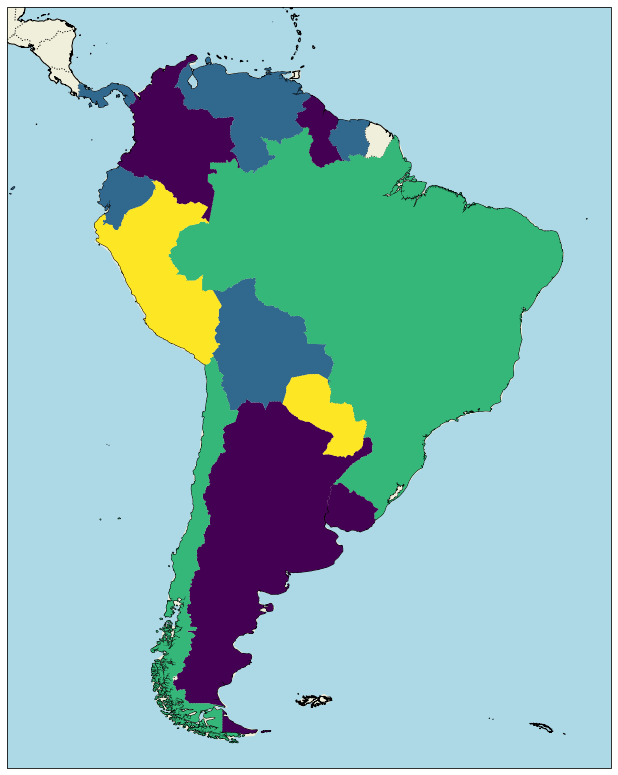

In [8]:
sahpefilename = shapereader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
df = geopandas.read_file(sahpefilename)

plt.figure(figsize=(18,14))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-90, -30, -55, 15])

ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1)
ax.add_feature(cartopy.feature.OCEAN, facecolor=("lightblue"))
ax.add_feature(cartopy.feature.LAND)
ax.coastlines(resolution='10m')



color_norm = (color-np.nanmin(color))/(np.nanmax(color) - np.nanmin(color))
cmap = matplotlib.cm.get_cmap('viridis')
 
for country, color_norm in zip(countries, color_norm):
        # read the borders of the country in this loop
        poly = df.loc[df['ADMIN'] == country]['geometry'].values[0]
        # get the color for this country
        rgba = cmap(color_norm)
        # plot the country on a map
        ax.add_geometries([poly], crs=ccrs.PlateCarree(), facecolor=rgba, edgecolor='none', zorder=1)
        